# Initial Analysis

## Finding stimuli with highest number of participants
Each stimulus is seen by a specific number of participants. In this part we want to find out which stimuli have been visited the most. We use these stimulus to train a sequence model with a single stimuli.

In [6]:
import os

import pandas as pd

import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./Data/Raw_Data/Harmonized_Instrument_Data-002.csv", nrows=10)
data.columns

Index(['Study', 'Subject_ID', 'StimName', 'Experiment_Time',
       'CALIB_VALID_POINTS', 'Group', 'Age', 'Handedness', 'Country',
       'Language', 'Gender', 'Eyewear', 'Session_Date', 'Block',
       'Big5_Openness', 'Big5_Conscientiousness', 'Big5_Extraversion',
       'Big5_Agreeableness', 'Big5_Neuroticism', 'Expert', 'Ethnicity',
       'SessionDate', 'OrderStim', 'StartTime', 'EndTime', 'PosNegAdSAM',
       'ExciteCalmAdSAM', 'ImpCom', 'PosCom', 'LikeCom', 'ViewsCom',
       'PreLikelyFav', 'PostLikelyFav', 'LikelyFavDifference', 'PostOften',
       'CNT', 'Eye_Time', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD',
       'FPOGID', 'FPOGV', 'BPOGX', 'BPOGY', 'BPOGV', 'LPCX', 'LPCY', 'LPD',
       'LPS', 'LPV', 'RPCX', 'RPCY', 'RPD', 'RPS', 'RPV', 'LPUPILD', 'LPUPILV',
       'RPUPILD', 'RPUPILV', 'Frame', 'Distance_to_Next_Frame', 'Face_Time',
       'Anger_Evidence', 'Anger_Intensity', 'Contempt_Evidence',
       'Contempt_Intensity', 'Disgust_Evidence', 'Disgust_Intensity',

In [3]:
data2 = pd.read_csv("./Data/Raw_Data/Harmonized_Instrument_Data-002.csv", usecols =["Subject_ID", "StimName"])

C:\Users\zandv003\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Get the frequency of each stimulus
grouped_df = data2.groupby("StimName")

grouped_df = grouped_df.agg({"Subject_ID": "nunique"})

grouped_df = grouped_df.reset_index()

In [5]:
grouped_df.columns = ['StimName', 'Freq']

In [6]:
grouped_df

,StimName,Freq
0,300,6
1,1050,7
2,1111,3
3,1201,10
4,1202,6
...,...,...
144,TurboTax2014,37
145,Unbroken,41
146,Volkswagen2014,48
147,WishHere,40


In [7]:
# Check for the stimulus name that exists in the valid files (some stimulus names do not exist in these files)
file_names = ['SuperMovie0102_L.csv',
 'SuperMovie0304_L.csv',
 'SuperMovie0506_L.csv',
 'SuperMovie0708_L.csv',
 'SuperMovie1516_L.csv',
 'SuperMovie1718_L.csv',
 'SuperMovie1920_L.csv',
 'SuperMovie2122_L.csv']

#file_names = os.listdir('./Data/Lab_Recall_Hand_Edited/')

# Make a dic of data files with file name as the key and dataframe as the value
recall_data_files = {}
valid_stimuli = []
for file_name in file_names:
    
    df = pd.read_csv('./Data/Lab_Recall_Hand_Edited/' + file_name)

    df['FileName'] = file_name.split('.')[0]
    recall_data_files[file_name.split('.')[0]] = df
    
for (file_name, recall_df) in recall_data_files.items():
    for movie_name in recall_df.columns:
        valid_stimuli.append(movie_name)

valid_stimuli = set(valid_stimuli)

In [8]:
valid_stimuli

{'300',
 'Always',
 'Audi',
 'BMW',
 'BudLight',
 'Budweiser',
 'Butterfing',
 'Cesar',
 'Chobani',
 'Chrysler',
 'CocaCola',
 'CocaColaBe',
 'CptAmerica',
 'Dannon',
 'Divergent',
 'Doritos',
 'Dove',
 'DumbTo',
 'Email',
 'EmailAddress',
 'EndDate',
 'Esurance',
 'Exodus',
 'ExternalDataReference',
 'ExternalReference',
 'Fiat',
 'FileName',
 'GetHard',
 'GoDaddy',
 'GoDaddyPup',
 'GraceofMon',
 'HandM',
 'Honda',
 'Hyundai',
 'HyundaiGen',
 'InherentVi',
 'InsideOut',
 'InstTrail',
 'Interstell',
 'Jaguar',
 'Kia',
 'Lexus',
 'MMs',
 'Maserati',
 'McDonalds',
 'Mercedes',
 'MountainDe',
 'Muppets',
 'NFL',
 'Name',
 'Nationwide',
 'Needforspe',
 'Noah',
 'NonStop',
 'Ouija',
 'PeabodyShe',
 'Pepsi',
 'Pistachio2',
 'Pyramid',
 'Sabotage',
 'SanAndreas',
 'Sodastream',
 'Sprint',
 'Spy',
 'Squarespac',
 'StartDate',
 'Subway',
 'TMobile',
 'TheBestOfM',
 'TheCulling',
 'TheLongest',
 'TmobileSti',
 'Tomorrowla',
 'ToyotaHigh',
 'Tyler',
 'Unbroken',
 'Volkswagon',
 'Walkofsham',
 'Wh

## All of Histograms for Stimuli Recall

In [64]:
all_file_names = os.listdir('./Data/Lab_Recall_Hand_Edited/')
non_stim_cols = ['Name', 'EmailAddress', 'Email', 'ExternalDataReference', 'ExternalReference', 'StartDate', 
                 'EndDate', 'FileName', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail' ]

all_stim_recall_tidy = pd.DataFrame(columns = ["Stimulus", "Recall"])

for file_name in all_file_names:
    stim_cols = []
    df = pd.read_csv('./Data/Lab_Recall_Hand_Edited/' + file_name)
    col_names = df.columns
    for col_name in col_names:    
        if not(col_name in non_stim_cols):
            stim_cols.append(col_name)
    df = df[stim_cols]
    df = pd.melt(df, var_name='Stimulus', value_name='Recall')
    
    all_stim_recall_tidy = all_stim_recall_tidy.append(df, ignore_index=True)

In [65]:
all_stim_recall_tidy

,Stimulus,Recall
0,Hyundai,2.0
1,Hyundai,3.0
2,Hyundai,2.0
3,Hyundai,8.0
4,Hyundai,8.0
...,...,...
9375,SanAndreas,7.0
9376,SanAndreas,7.0
9377,SanAndreas,7.0
9378,SanAndreas,7.0


In [74]:
len(all_stim_recall_tidy.Stimulus.unique())

102

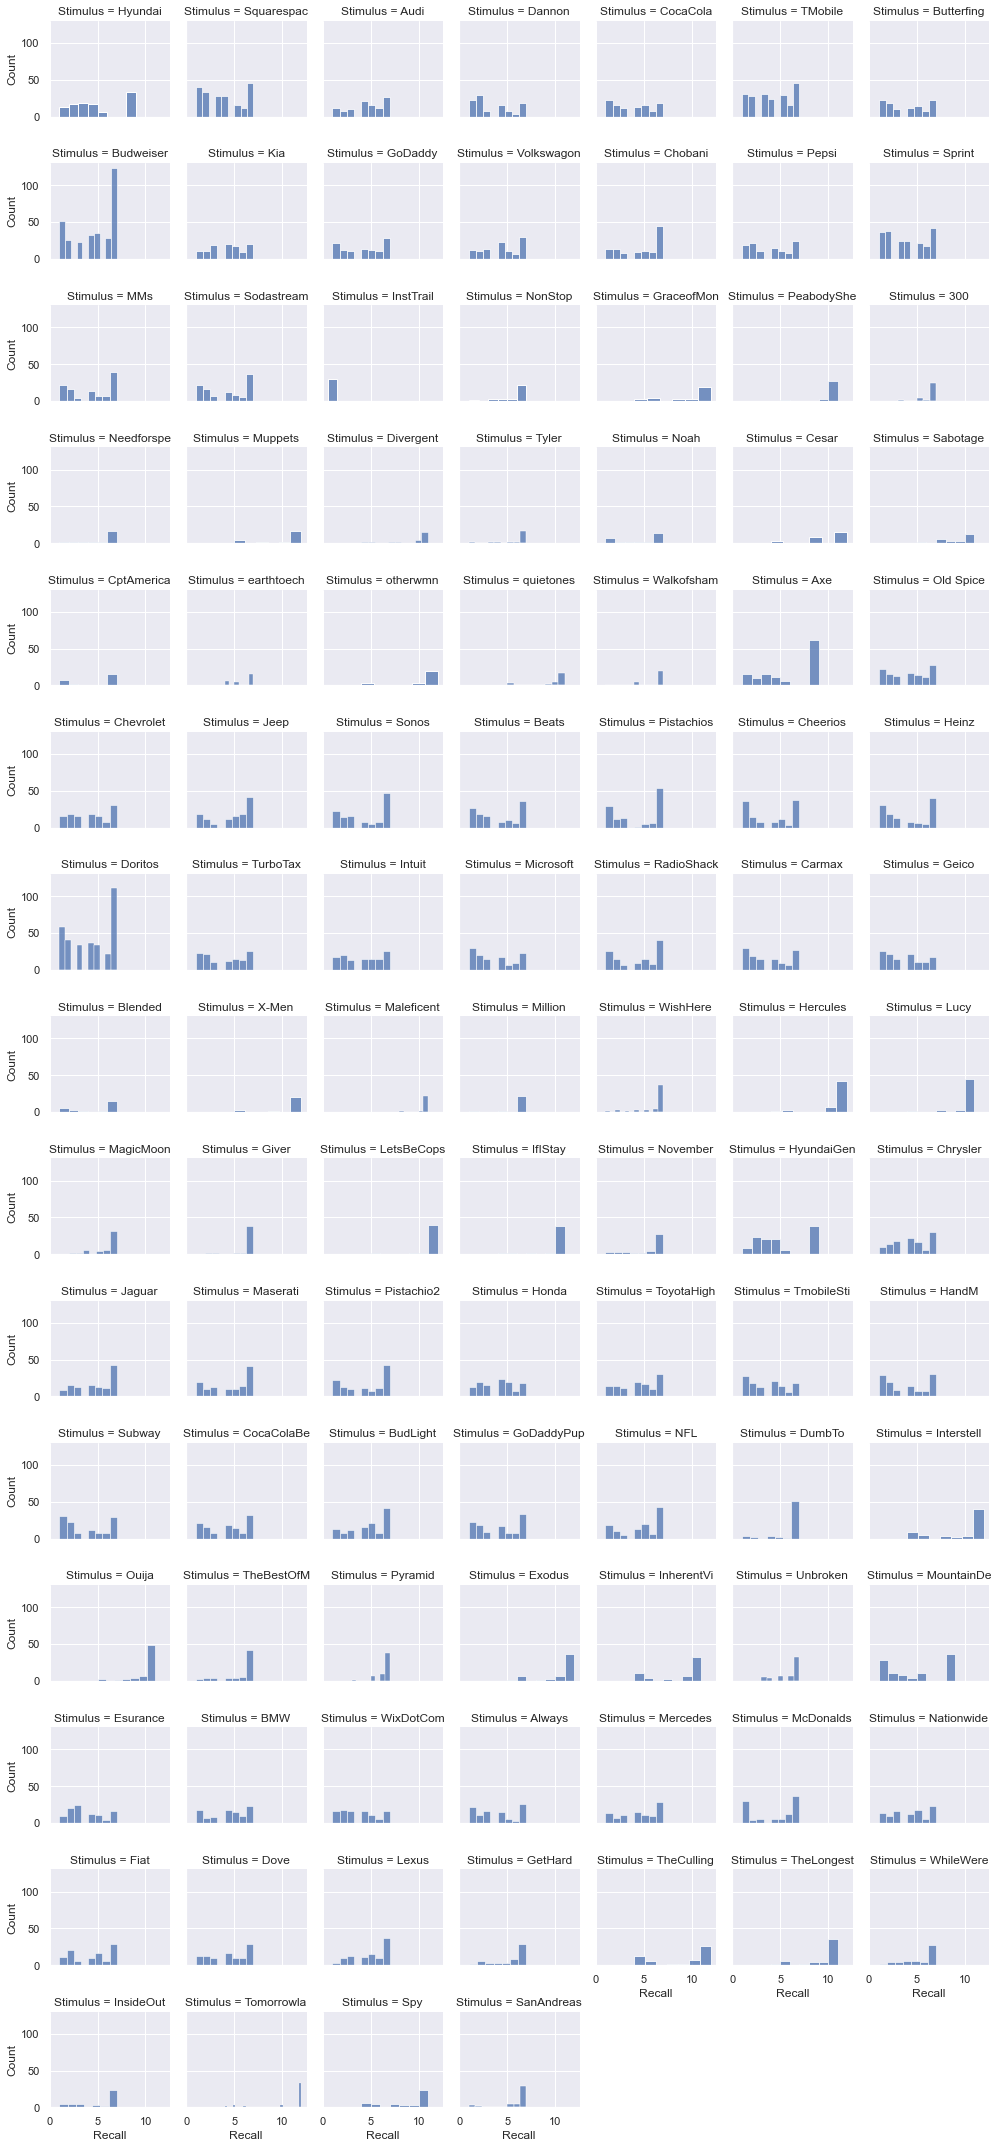

In [73]:
sns.set_theme()
g = sns.FacetGrid(all_stim_recall_tidy, col="Stimulus", col_wrap=7, height=2)
g.map(sns.histplot, "Recall")

In [9]:
# valid stimuli are the stimuli that are on the recall data files.
# valid_grouped_df are the stimuli that are on both recall data files and harmonized data
valid_grouped_df = grouped_df[grouped_df.StimName.isin(valid_stimuli)]

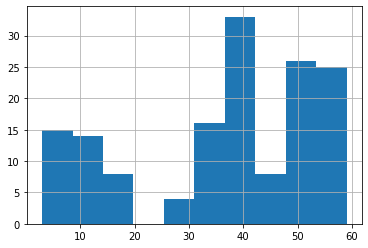

In [10]:
grouped_df.describe()
grouped_df.Freq.hist()
plt.show()

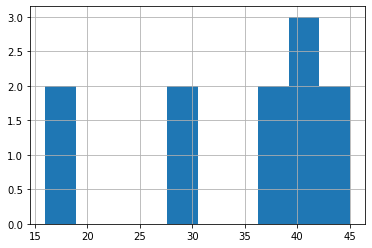

In [11]:
grouped_df.describe()
valid_grouped_df.Freq.hist()
plt.show()

In [12]:
grouped_df.iloc[grouped_df['Freq'].argmax(), :]

StimName    9326
Freq          59
Name: 48, dtype: object

In [13]:
grouped_df[grouped_df.Freq == 59]

,StimName,Freq
48,9326,59
52,Beats2014,59
59,BudweiserClydesdales,59
64,Cheerios2014,59
65,Chevy2014,59
70,CokeCameras2013,59
74,Doritos2014,59
79,Geico2014,59
82,GoDaddyPerfectMatch2,59
91,HyundaiSonata2013,59


In [14]:
valid_grouped_df.iloc[valid_grouped_df['Freq'].argmax(), :]

StimName    DumbTo
Freq            45
Name: 76, dtype: object

In [15]:
valid_grouped_df[valid_grouped_df.Freq == 45]

,StimName,Freq
76,DumbTo,45
119,Ouija,45


I have chosen "Ouija" as may subsample movie, and next I am going to use only users who have seen this movie. The spark code in the file MovieFreq.py is used to filter only records that use this stimuli and the subsampled data file is called SubSample.csv

In [16]:
for (file_name, recall_df) in recall_data_files.items():
    if "DumbTo" in recall_df.columns:
        print(file_name)

SuperMovie1516_L


In [17]:
for (file_name, recall_df) in recall_data_files.items():
    if "Ouija" in recall_df.columns:
        print(file_name)

SuperMovie1516_L


## Analysis with "DumbTo" Stimulus

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

from sklearn.metrics import accuracy_score

In [2]:
sub_DumbTo = pd.read_csv("./Data/Subsamples/DumbTo.csv")
print("Subject Count: ",len(sub_DumbTo.Subject_ID.unique()))
print("Columns:\n")
print(sub_DumbTo.columns)

Subject Count:  45
Columns:

Index(['Study', 'Subject_ID', 'StimName', 'Experiment_Time',
       'CALIB_VALID_POINTS', 'Group', 'Age', 'Handedness', 'Country',
       'Language', 'Gender', 'Eyewear', 'Session_Date', 'Block',
       'Big5_Openness', 'Big5_Conscientiousness', 'Big5_Extraversion',
       'Big5_Agreeableness', 'Big5_Neuroticism', 'Expert', 'Ethnicity',
       'SessionDate', 'OrderStim', 'StartTime', 'EndTime', 'PosNegAdSAM',
       'ExciteCalmAdSAM', 'ImpCom', 'PosCom', 'LikeCom', 'ViewsCom',
       'PreLikelyFav', 'PostLikelyFav', 'LikelyFavDifference', 'PostOften',
       'CNT', 'Eye_Time', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD',
       'FPOGID', 'FPOGV', 'BPOGX', 'BPOGY', 'BPOGV', 'LPCX', 'LPCY', 'LPD',
       'LPS', 'LPV', 'RPCX', 'RPCY', 'RPD', 'RPS', 'RPV', 'LPUPILD', 'LPUPILV',
       'RPUPILD', 'RPUPILV', 'Frame', 'Distance_to_Next_Frame', 'Face_Time',
       'Anger_Evidence', 'Anger_Intensity', 'Contempt_Evidence',
       'Contempt_Intensity', 'Disgust_Ev

In [3]:
related_features = ['Subject_ID','FPOGX', 'FPOGY', 'FPOGS', 'FPOGD',
       'FPOGID', 'FPOGV', 'BPOGX', 'BPOGY', 'BPOGV', 'LPCX', 'LPCY', 'LPD',
       'LPS', 'LPV', 'RPCX', 'RPCY', 'RPD', 'RPS', 'RPV', 'LPUPILD', 'LPUPILV',
       'RPUPILD', 'RPUPILV', 'Face_Time',
       'Anger_Evidence', 'Anger_Intensity', 'Contempt_Evidence',
       'Contempt_Intensity', 'Disgust_Evidence', 'Disgust_Intensity',
       'Joy_Evidence', 'Joy_Intensity', 'Fear_Evidence', 'Fear_Intensity',
       'Negative_Evidence', 'Negative_Intensity', 'Neutral_Evidence',
       'Neutral_Intensity', 'Positive_Evidence', 'Positive_Intensity',
       'Sadness_Evidence', 'Sadness_Intensity', 'Surprise_Evidence',
       'Surprise_Intensity', 'Heart_Time',
       'Normed_Heart_Rate',
       'Normed_LPD', 'Normed_RPD', 'bpogx_dmean', 'bpogy_dmean',
       'combined_normed_bpogxy', 'Normed_LPS', 'Normed_RPS']

In [4]:
data_recall = pd.read_csv('./Data/Lab_Recall_Hand_Edited/SuperMovie1516_L.csv')
data_recall.DumbTo.describe()

count    63.000000
mean      6.285714
std       1.660048
min       1.000000
25%       7.000000
50%       7.000000
75%       7.000000
max       7.000000
Name: DumbTo, dtype: float64

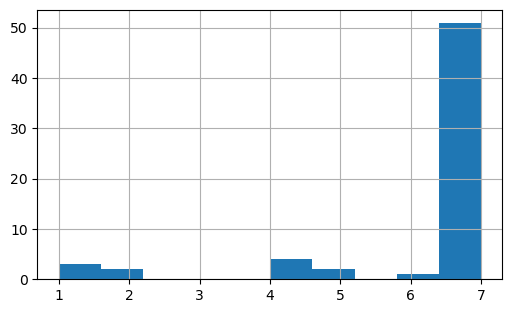

In [5]:
data_recall.DumbTo.hist(figsize=(6,3.5))
plt.show()

In [6]:
seq_length = sub_DumbTo.groupby("Subject_ID").size().reset_index()
seq_length.columns = ["Subject_ID", "Length"]
num_of_subjects = seq_length.shape[0]
print("Number of subjects:", num_of_subjects)

Number of subjects: 45


In [7]:
seq_length.Length.min()

9676

In [8]:
# remove user 344 from seq-length and data (length is outlier)
seq_length = seq_length[seq_length.Subject_ID != 344]
sub_DumbTo = sub_DumbTo[sub_DumbTo.Subject_ID != 344]

In [9]:
num_of_subjects = seq_length.shape[0]
print("Number of subjects:", num_of_subjects)

Number of subjects: 44


In [10]:
cut_off = seq_length.Length.min()
print("Cutoff is :", cut_off)

Cutoff is : 9744


In [11]:
seq_length['Sum_Length'] = seq_length.Length.cumsum() 

In [12]:
seq_length = seq_length.reset_index()

In [13]:
seq_length

,index,Subject_ID,Length,Sum_Length
0,0,300,9751,9751
1,1,305,9751,19502
2,2,306,9750,29252
3,3,307,9748,39000
4,4,308,9749,48749
5,5,309,9749,58498
6,6,311,9752,68250
7,7,313,9749,77999
8,8,319,9749,87748
9,9,321,9749,97497


In [14]:
seq_length.shape

(44, 4)

In [15]:
sub_DumbTo.shape

(428964, 98)

In [16]:
# Adjust the length of all seqs
cut_off = seq_length.Length.min()

rem_index = np.zeros(sub_DumbTo.shape[0])
rem_index[0 : cut_off] = 1  
for i in range(0, seq_length.shape[0]-1):
    rem_index[seq_length.Sum_Length[i] : seq_length.Sum_Length[i]  + cut_off] = 1
    
sub_DumbTo["Rem_Index"] = rem_index

sub_DumbTo = sub_DumbTo[sub_DumbTo.Rem_Index == 1]

In [17]:
print("Sqeuence length after adjustment", sub_DumbTo.shape[0]/44)

Sqeuence length after adjustment 9744.0


In [18]:
sub_DumbTo = sub_DumbTo[related_features]

In [19]:
num_non_zero_nulls_in_cols = sub_DumbTo.isnull().sum().reset_index()
num_non_zero_nulls_in_cols.columns = ["Column", "Num_Nulls"]
num_non_zero_nulls_in_cols = num_non_zero_nulls_in_cols[num_non_zero_nulls_in_cols.Num_Nulls != 0]

In [20]:
# In the data one user has no value for the above columns and the first value of all users is null
num_non_zero_nulls_in_cols

,Column,Num_Nulls
49,bpogx_dmean,9744
50,bpogy_dmean,9744
51,combined_normed_bpogxy,9744
52,Normed_LPS,9787
53,Normed_RPS,9787


In [21]:
# remove user 345 from seq-length and data (has missing values for 4 columns)
seq_length = seq_length[seq_length.Subject_ID != 345]
# We can remove all nulls and make the sequnce one unit smaller
sub_DumbTo = sub_DumbTo.dropna()

In [22]:
# For the above four columns the first element of each sequence was na, so the sequence length (cut_off) is reduced by 1
cut_off = cut_off - 1
num_of_subjects = sub_DumbTo.shape[0]/(cut_off)
print("Sequence length (cutt_off) equls: ", cut_off)
print("Number of Subjects is: ", num_of_subjects)

Sequence length (cutt_off) equls:  9743
Number of Subjects is:  43.0


In [23]:
sub_DumbTo = sub_DumbTo.drop(columns=['Subject_ID'])

In [24]:
# One participants had null values for the last four variables we drop that, so we reduce one from seq_length.shape[0]
# we dropped subject_id from related features so we have len(related_features) -1 in reshape dimmentions
x = sub_DumbTo.to_numpy()
x = x.reshape(int(num_of_subjects), -1, len(related_features) -1 )

In [25]:
x.shape

(43, 9743, 53)

In [80]:
y = []
for subject_id in seq_length.Subject_ID:
    y.append(data_recall[data_recall.ExternalReference == subject_id].DumbTo.tolist()[0])

In [81]:
y = np.array(y)

In [82]:
len(y)

43

## Modeling

In [31]:
x_train = x[:37]
y_train = y[:37]
x_valid = x[37:]
y_valid = y[37:]

In [32]:
special_value = -9999.99
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen = cut_off, padding = "post", dtype = 'float64', value = special_value)
x_valid = keras.preprocessing.sequence.pad_sequences(x_valid, maxlen = cut_off, padding = "post", dtype = 'float64', value = special_value)

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(37, 9743, 53)
(37,)
(6, 9743, 53)
(6,)


In [33]:
model = keras.Sequential()
model.add(keras.layers.Masking(mask_value=special_value, input_shape=(cut_off, len(related_features) -1)))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(1))

In [34]:
model.compile(loss = keras.losses.MeanSquaredError(),
              optimizer = keras.optimizers.Adam(learning_rate=0.01))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 9743, 53)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                11008     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 11,041
Trainable params: 11,041
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(x = x_train, y = y_train, 
                    validation_data = (x_valid, y_valid),
                    epochs = 25)

Epoch 1/25
2/2 [==============================] - 4s 2s/step - loss: 45.5052 - val_loss: 28.1534
Epoch 2/25
2/2 [==============================] - 3s 2s/step - loss: 34.2715 - val_loss: 21.7571
Epoch 3/25
2/2 [==============================] - 3s 2s/step - loss: 27.9169 - val_loss: 18.6422
Epoch 4/25
2/2 [==============================] - 3s 1s/step - loss: 24.6452 - val_loss: 16.6625
Epoch 5/25
2/2 [==============================] - 4s 2s/step - loss: 22.4033 - val_loss: 14.2873
Epoch 6/25
2/2 [==============================] - 3s 2s/step - loss: 19.8724 - val_loss: 12.9023
Epoch 7/25
2/2 [==============================] - 3s 2s/step - loss: 17.4054 - val_loss: 11.6695
Epoch 8/25
2/2 [==============================] - 3s 2s/step - loss: 15.5360 - val_loss: 10.5145
Epoch 9/25
2/2 [==============================] - 3s 2s/step - loss: 13.7890 - val_loss: 9.4616
Epoch 10/25
2/2 [==============================] - 4s 2s/step - loss: 12.5942 - val_loss: 8.5100
Epoch 11/25
2/2 [==============

In [37]:
model = keras.Sequential()
model.add(keras.layers.Masking(mask_value=special_value, input_shape=(cut_off, len(related_features) -1)))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(1))

In [39]:
model.compile(loss = keras.losses.MeanSquaredError(),
              optimizer = keras.optimizers.Adam(learning_rate=0.01))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 9743, 53)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                30208     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 30,273
Trainable params: 30,273
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(x = x_train, y = y_train, 
                    validation_data = (x_valid, y_valid),
                    epochs = 25)

Epoch 1/25
2/2 [==============================] - 5s 3s/step - loss: 38.7432 - val_loss: 23.4972
Epoch 2/25
2/2 [==============================] - 5s 2s/step - loss: 25.5642 - val_loss: 13.9483
Epoch 3/25
2/2 [==============================] - 5s 3s/step - loss: 18.8331 - val_loss: 10.9709
Epoch 4/25
2/2 [==============================] - 5s 3s/step - loss: 14.8848 - val_loss: 9.3669
Epoch 5/25
2/2 [==============================] - 5s 3s/step - loss: 12.3729 - val_loss: 7.8760
Epoch 6/25
2/2 [==============================] - 5s 3s/step - loss: 9.9305 - val_loss: 6.4136
Epoch 7/25
2/2 [==============================] - 6s 3s/step - loss: 7.8362 - val_loss: 4.4574
Epoch 8/25
2/2 [==============================] - 5s 3s/step - loss: 5.4061 - val_loss: 3.8614
Epoch 9/25
2/2 [==============================] - 5s 3s/step - loss: 3.8498 - val_loss: 3.5954
Epoch 10/25
2/2 [==============================] - 6s 3s/step - loss: 2.7828 - val_loss: 3.8728
Epoch 11/25
2/2 [========================

In [43]:
model = keras.Sequential()
model.add(keras.layers.Masking(mask_value=special_value, input_shape=(cut_off, len(related_features) -1)))
model.add(keras.layers.LSTM(32, return_sequences=True))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(1))

In [44]:
model.compile(loss = keras.losses.MeanSquaredError(),
              optimizer = keras.optimizers.Adam(learning_rate=0.01))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_3 (Masking)          (None, 9743, 53)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 9743, 32)          11008     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 19,361
Trainable params: 19,361
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(x = x_train, y = y_train, 
                    validation_data = (x_valid, y_valid),
                    epochs = 25)

Epoch 1/25
2/2 [==============================] - 15s 8s/step - loss: 40.0247 - val_loss: 15.8321
Epoch 2/25
2/2 [==============================] - 13s 6s/step - loss: 18.4837 - val_loss: 7.6528
Epoch 3/25
2/2 [==============================] - 14s 7s/step - loss: 8.8008 - val_loss: 4.3142
Epoch 4/25
2/2 [==============================] - 14s 7s/step - loss: 3.6716 - val_loss: 3.5219
Epoch 5/25
2/2 [==============================] - 14s 7s/step - loss: 1.4072 - val_loss: 4.6316
Epoch 6/25
2/2 [==============================] - 14s 7s/step - loss: 1.2425 - val_loss: 6.2443
Epoch 7/25
2/2 [==============================] - 14s 7s/step - loss: 1.9730 - val_loss: 7.2344
Epoch 8/25
2/2 [==============================] - 14s 7s/step - loss: 2.4809 - val_loss: 7.3334
Epoch 9/25
2/2 [==============================] - 15s 7s/step - loss: 2.5204 - val_loss: 6.8920
Epoch 10/25
2/2 [==============================] - 15s 8s/step - loss: 2.2474 - val_loss: 6.1746
Epoch 11/25
1/2 [==============>....

KeyboardInterrupt: 

In [131]:
y_df = pd.DataFrame(y)
y_df.columns = ['Cont']
y_df["Dis"] = 1

In [132]:
y_df.loc[y_df.Cont > 5, "Dis"] = 2
y_df.loc[y_df.Cont < 3, "Dis"] = 0

In [133]:
y_df.head()

,Cont,Dis
0,7.0,2
1,7.0,2
2,2.0,0
3,7.0,2
4,7.0,2


In [134]:
y_dis = np.array(y_df.Dis)

In [136]:
y_dis_train = y_dis[:37]
y_dis_valid = y_dis[37:]

In [137]:
model = keras.Sequential()
model.add(keras.layers.Masking(mask_value=special_value, input_shape=(cut_off, len(related_features) -1)))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(3, activation='softmax'))

In [138]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [139]:
history = model.fit(x = x_train, y = y_dis_train, 
                    validation_data = (x_valid, y_dis_valid),
                    epochs = 25)

Epoch 1/25
2/2 [==============================] - 5s 3s/step - loss: 1.5475 - accuracy: 0.0270 - val_loss: 1.3047 - val_accuracy: 0.1667
Epoch 2/25
2/2 [==============================] - 4s 2s/step - loss: 1.4198 - accuracy: 0.0270 - val_loss: 1.2349 - val_accuracy: 0.1667
Epoch 3/25
2/2 [==============================] - 4s 2s/step - loss: 1.3128 - accuracy: 0.0270 - val_loss: 1.1739 - val_accuracy: 0.1667
Epoch 4/25
2/2 [==============================] - 4s 2s/step - loss: 1.2171 - accuracy: 0.0270 - val_loss: 1.1183 - val_accuracy: 0.1667
Epoch 5/25
2/2 [==============================] - 4s 2s/step - loss: 1.1270 - accuracy: 0.0270 - val_loss: 1.0687 - val_accuracy: 0.1667
Epoch 6/25
2/2 [==============================] - 4s 2s/step - loss: 1.0443 - accuracy: 0.1081 - val_loss: 1.0259 - val_accuracy: 0.5000
Epoch 7/25
2/2 [==============================] - 4s 2s/step - loss: 0.9648 - accuracy: 0.5676 - val_loss: 0.9898 - val_accuracy: 0.6667
Epoch 8/25
2/2 [=========================

In [147]:
y_dis_pred = np.full(y_dis_valid.shape, 2)
accuracy_score(y_dis_valid, y_dis_pred)

0.6666666666666666

array([2, 2, 2, 2, 2, 2])

In [126]:
y_dis_train = tf.keras.utils.to_categorical(y_dis_train, num_classes=3)
y_dis_valid = tf.keras.utils.to_categorical(y_dis_valid, num_classes=3)

In [127]:
y_dis_valid

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [128]:
model = keras.Sequential()
model.add(keras.layers.Masking(mask_value=special_value, input_shape=(cut_off, len(related_features) -1)))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(3, activation='softmax'))

In [129]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [130]:
history = model.fit(x = x_train, y = y_dis_train, 
                    validation_data = (x_valid, y_dis_valid),
                    epochs = 25)

Epoch 1/25
2/2 [==============================] - 11s 5s/step - loss: 2.0741 - accuracy: 0.0541 - val_loss: 1.5584 - val_accuracy: 0.1667
Epoch 2/25
2/2 [==============================] - 8s 4s/step - loss: 1.5065 - accuracy: 0.0811 - val_loss: 1.3406 - val_accuracy: 0.1667
Epoch 3/25
2/2 [==============================] - 10s 5s/step - loss: 1.1840 - accuracy: 0.1351 - val_loss: 1.1959 - val_accuracy: 0.3333
Epoch 4/25
2/2 [==============================] - 4s 2s/step - loss: 0.8903 - accuracy: 0.6486 - val_loss: 0.9811 - val_accuracy: 0.5000
Epoch 5/25
2/2 [==============================] - 4s 2s/step - loss: 0.6570 - accuracy: 0.8919 - val_loss: 0.9925 - val_accuracy: 0.5000
Epoch 6/25
2/2 [==============================] - 4s 2s/step - loss: 0.5692 - accuracy: 0.9189 - val_loss: 1.0513 - val_accuracy: 0.5000
Epoch 7/25
2/2 [==============================] - 4s 2s/step - loss: 0.4615 - accuracy: 0.9189 - val_loss: 1.2870 - val_accuracy: 0.5000
Epoch 8/25
2/2 [=======================

In [148]:
y_dis_valid

array([0, 2, 2, 2, 2, 1], dtype=int64)

In [149]:
y_dis_train

array([2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)